In [122]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

### Phần 1: Khám phá dữ liệu

1.	Đọc file CSV data_ban_hang.csv vào một DataFrame.

In [123]:
df = pd.read_csv("../data/data_ban_hang.csv")

2.	Hiển thị 10 dòng đầu tiên và 10 dòng cuối cùng của bảng dữ liệu.

In [124]:
df.head()

,Order_ID,Date,Product,Quantity,Price
0,3001,2024-08-14,Headphones,3,50
1,3002,2024-10-08,Monitor,5,30
2,3003,2024-05-26,Printer,5,30
3,3004,2024-03-25,Keyboard,3,50
4,3005,2024-11-19,Laptop,2,50


In [125]:
df.tail()

,Order_ID,Date,Product,Quantity,Price
995,3996,2024-11-03,Phone,1,500
996,3997,2024-07-12,Mouse,1,30
997,3998,2024-06-20,Keyboard,2,800
998,3999,2024-05-05,Keyboard,3,800
999,4000,2024-09-18,Mouse,2,200


3.	Cho biết số lượng dòng và số lượng cột của dataset.

In [126]:
[dong, cot] = df.shape
print("Số lượng dòng là:", dong)
print("Số lượng cột là:", cot)

Số lượng dòng là: 1000
Số lượng cột là: 5


4.	Hiển thị thông tin chi tiết về dataset (kiểu dữ liệu, số lượng giá trị không null).

In [127]:
print("Thông tin về kiểu dữ liệu:")
df.info()

Thông tin về kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order_ID  1000 non-null   int64 
 1   Date      1000 non-null   object
 2   Product   1000 non-null   object
 3   Quantity  1000 non-null   int64 
 4   Price     1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


5.	Kiểm tra và đếm số lượng giá trị NaN trong mỗi cột.

In [128]:
print("Số lượng giá trị na trong mỗi cột:")
df.isna().sum()

Số lượng giá trị na trong mỗi cột:


Order_ID    0
Date        0
Product     0
Quantity    0
Price       0
dtype: int64

6.	Kiểm tra xem có đơn hàng nào bị trùng Order_ID hay không.

In [129]:
temp_series = df["Order_ID"].duplicated(keep=False)

print("Số lượng giá trị trùng", temp_series.sum())

print("Các đơn hàng bị trùng Order_ID:")
df[temp_series]

Số lượng giá trị trùng 0
Các đơn hàng bị trùng Order_ID:


,Order_ID,Date,Product,Quantity,Price


### Phần 2: Thống kê doanh số theo thời gian

7.	Tính tổng doanh số (Total_Sales = Quantity * Price) theo từng tháng.

In [130]:
df["Date"] = pd.to_datetime(df["Date"])

In [131]:
df["Month"] = df["Date"].dt.month
df["Total_Sales"] = df["Quantity"] * df["Price"]

temp_df = df.groupby(["Month"]).agg(Total_Sales_By_Month=("Total_Sales", "sum")).reset_index()
temp_df

,Month,Total_Sales_By_Month
0,1,54010
1,2,50460
2,3,83560
3,4,77170
4,5,78220
5,6,93450
6,7,64950
7,8,77190
8,9,63500
9,10,82450


8.	Tính tổng doanh số theo từng quý.

In [132]:
df["Quarter"] = df["Date"].dt.quarter

temp_df = df.groupby(["Quarter"]).agg(Total_Sales_By_Quarter=("Total_Sales", "sum")).reset_index()
temp_df

,Quarter,Total_Sales_By_Quarter
0,1,188030
1,2,248840
2,3,205640
3,4,233010


9.	Tính tổng doanh số theo từng ngày trong tuần (thứ 2 đến chủ nhật).

In [133]:
weekday_mapping = {
    0: "Thứ Hai", 1: "Thứ Ba", 2: "Thứ Tư", 3: "Thứ Năm", 
    4: "Thứ Sáu", 5: "Thứ Bảy", 6: "Chủ Nhật"
}

df["Weekday"] = df["Date"].dt.weekday.map(weekday_mapping)


temp_df = df.groupby(["Weekday"]).agg(Total_Sales_By_Weekday=("Total_Sales", "sum")).reset_index()
temp_df

,Weekday,Total_Sales_By_Weekday
0,Chủ Nhật,113790
1,Thứ Ba,127530
2,Thứ Bảy,146100
3,Thứ Hai,151300
4,Thứ Năm,108650
5,Thứ Sáu,111960
6,Thứ Tư,116190


10.	Tính trung bình giá sản phẩm (Price) theo từng tháng.

In [134]:
temp_df = df.groupby(["Month"]).agg(Trung_bình_giá_sản_phẩm=("Price", "mean")).reset_index()
temp_df

,Month,Trung_bình_giá_sản_phẩm
0,1,286.617647
1,2,287.903226
2,3,304.606742
3,4,309.529412
4,5,279.438202
5,6,289.909910
6,7,282.750000
7,8,281.190476
8,9,265.443038
9,10,326.626506


In [135]:
df.head()

,Order_ID,Date,Product,Quantity,Price,Month,Total_Sales,Quarter,Weekday
0,3001,2024-08-14,Headphones,3,50,8,150,3,Thứ Tư
1,3002,2024-10-08,Monitor,5,30,10,150,4,Thứ Ba
2,3003,2024-05-26,Printer,5,30,5,150,2,Chủ Nhật
3,3004,2024-03-25,Keyboard,3,50,3,150,1,Thứ Hai
4,3005,2024-11-19,Laptop,2,50,11,100,4,Thứ Ba


11.	Tính tổng số lượng sản phẩm bán ra theo từng tháng.

In [136]:
temp_df = df.groupby(["Month"]).agg(Tổng_lượng_sản_phẩm=("Quantity", "sum")).reset_index()
temp_df

,Month,Tổng_lượng_sản_phẩm
0,1,189
1,2,171
2,3,278
3,4,258
4,5,281
5,6,336
6,7,235
7,8,270
8,9,233
9,10,235


12.	Tính số lượng đơn hàng theo từng quý.

In [137]:
temp_df = df.groupby(["Quarter"]).agg(Số_lượng_đơn_hàng=("Order_ID", "count")).reset_index()
temp_df

,Quarter,Số_lượng_đơn_hàng
0,1,219
1,2,285
2,3,243
3,4,253


13.	Xác định tháng có số lượng đơn hàng nhiều nhất và ít nhất.

In [138]:
temp_df = df.groupby(["Month"]).agg(Số_lượng_đơn_hàng=("Order_ID", "count")).reset_index()


max_month = temp_df.loc[temp_df["Số_lượng_đơn_hàng"].idxmax()]
min_month = temp_df.loc[temp_df["Số_lượng_đơn_hàng"].idxmin()]

print("Tháng có số đơn hàng nhiều nhất:")
print(max_month)
print("\nTháng có số đơn hàng ít nhất:")
print(min_month)

Tháng có số đơn hàng nhiều nhất:
Month                  6
Số_lượng_đơn_hàng    111
Name: 5, dtype: int64

Tháng có số đơn hàng ít nhất:
Month                 2
Số_lượng_đơn_hàng    62
Name: 1, dtype: int64


14.	Xác định quý có doanh số cao nhất và thấp nhất.

In [142]:
temp_df = df.groupby(["Quarter"]).agg(Doanh_Số=("Total_Sales", "sum")).reset_index()

max_quarter = temp_df.loc[temp_df["Doanh_Số"].idxmax()]
min_quarter = temp_df.loc[temp_df["Doanh_Số"].idxmin()]

print("Quý có số doanh số nhiều nhất:")
print(max_quarter)
print("\nQuý có số doanh số ít nhất:")
print(min_quarter)

Quý có số doanh số nhiều nhất:
Quarter          2
Doanh_Số    248840
Name: 1, dtype: int64

Quý có số doanh số ít nhất:
Quarter          1
Doanh_Số    188030
Name: 0, dtype: int64


15.	Xác định ngày trong tuần có doanh số cao nhất trung bình.

In [144]:
temp_df = df.groupby(["Weekday"]).agg(Doanh_Số=("Total_Sales", "mean")).reset_index()

max_weekday = temp_df.loc[temp_df["Doanh_Số"].idxmax()]

print("Ngày trong tuần có  doanh số cao nhất trung bình:")
max_weekday

Ngày trong tuần có  doanh số cao nhất trung bình:


Weekday        Thứ Bảy
Doanh_Số    930.573248
Name: 2, dtype: object

16.	Tính tổng doanh số trung bình theo từng tháng (tổng doanh số/tháng).

In [ ]:
temp_df = df.groupby(["Month"]).agg(Doanh_Số=("Total_Sales", "mean")).reset_index()
temp_df

,Month,Doanh_Số
0,1,794.264706
1,2,813.870968
2,3,938.876404
3,4,907.882353
4,5,878.876404
5,6,841.891892
6,7,811.875000
7,8,918.928571
8,9,803.797468
9,10,993.373494


17.	Xác định tháng có doanh số trung bình cao nhất và thấp nhất.

In [147]:
max_month = temp_df.loc[temp_df["Doanh_Số"].idxmax()]
max_month

Weekday        Thứ Bảy
Doanh_Số    930.573248
Name: 2, dtype: object

In [148]:
min_month = temp_df.loc[temp_df["Doanh_Số"].idxmin()]
min_month

Weekday        Thứ Năm
Doanh_Số    823.106061
Name: 4, dtype: object

18.	Tính tỷ lệ doanh số của từng tháng so với tổng doanh số cả năm.

In [ ]:
sum_revenue = df["Total_Sales"].sum()

temp_df = df.groupby(["Month"]).agg(Doanh_Số=("Total_Sales", "sum")).reset_index()
temp_df["rate"] = (temp_df["Doanh_Số"] / sum_revenue) * 100

temp_df

,Month,Doanh_Số,rate
0,1,54010,6.168905
1,2,50460,5.763432
2,3,83560,9.544042
3,4,77170,8.814190
4,5,78220,8.934119
5,6,93450,10.673657
6,7,64950,7.418448
7,8,77190,8.816475
8,9,63500,7.252833
9,10,82450,9.417261


19.	Tính tổng doanh số của từng quý và phần trăm đóng góp của từng quý so với tổng doanh số cả năm.

In [150]:
sum_revenue = df["Total_Sales"].sum()

temp_df = df.groupby(["Quarter"]).agg(Doanh_Số=("Total_Sales", "sum")).reset_index()
temp_df["rate"] = (temp_df["Doanh_Số"] / sum_revenue) * 100

temp_df

,Quarter,Doanh_Số,rate
0,1,188030,21.476380
1,2,248840,28.421966
2,3,205640,23.487756
3,4,233010,26.613898


### Phần 3: Phát hiện xu hướng 

20.	Liệt kê 5 ngày có tổng doanh số cao nhất, kèm theo tổng doanh số trong những ngày đó.

In [162]:
temp_df = df.groupby(["Date"]).agg(Doanh_Số=("Total_Sales", "sum")).reset_index()
temp_df.sort_values(by=["Doanh_Số"], ascending=False).head(5)

,Date,Doanh_Số
155,2024-06-16,11100
51,2024-02-28,10000
331,2024-12-21,9750
111,2024-05-02,9550
88,2024-04-08,9420


21.	Liệt kê 5 ngày có số lượng đơn hàng cao nhất.

In [164]:
temp_df = df.groupby(["Date"]).agg(Lượng_đơn_hàng=("Order_ID", "count")).reset_index()
temp_df.sort_values(by=["Lượng_đơn_hàng"], ascending=False).head(5)

,Date,Lượng_đơn_hàng
125,2024-05-17,9
269,2024-10-15,8
331,2024-12-21,8
61,2024-03-09,8
51,2024-02-28,7


22.	Liệt kê 5 tháng có doanh số thấp nhất.

In [165]:
temp_df = df.groupby(["Date"]).agg(Doanh_Số=("Total_Sales", "sum")).reset_index()
temp_df.sort_values(by=["Doanh_Số"]).head(5)

,Date,Doanh_Số
21,2024-01-23,50
295,2024-11-10,50
196,2024-07-29,60
340,2024-12-30,80
278,2024-10-24,100


23.	Xác định sản phẩm bán chạy nhất theo từng tháng.

In [185]:
temp_df = df.groupby(["Month", "Product"]).agg(Số_Lượng=("Quantity", "sum")).reset_index()
temp_df = temp_df.loc[temp_df.groupby("Month")["Số_Lượng"].idxmax()]
temp_df


,Month,Product,Số_Lượng
1,1,Keyboard,37
8,2,Headphones,35
18,3,Laptop,47
26,4,Laptop,49
35,5,Monitor,45
45,6,Phone,64
48,7,Headphones,47
60,8,Mouse,48
70,9,Printer,40
73,10,Keyboard,44


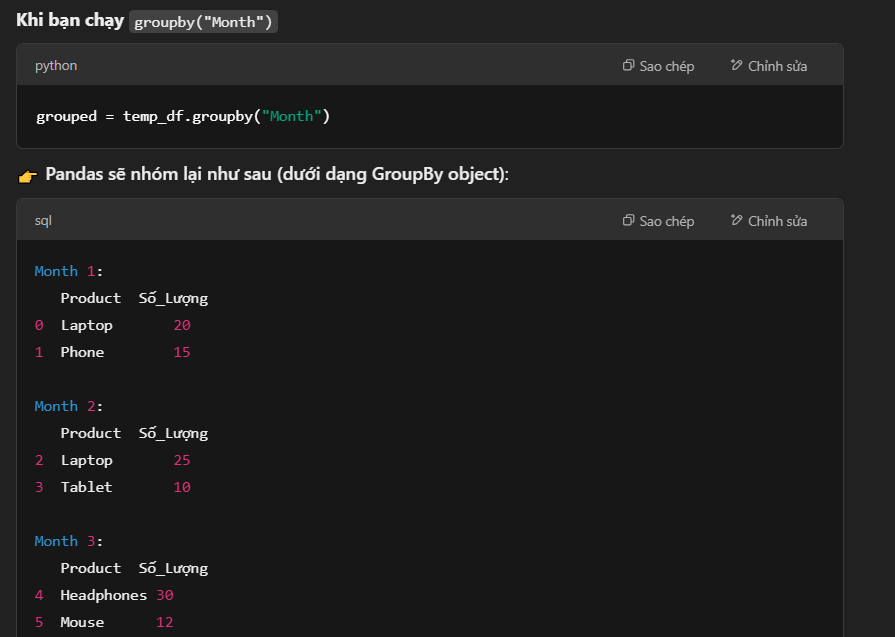

24.	Xác định sản phẩm có doanh số cao nhất theo từng quý.

In [188]:
temp_df = df.groupby(["Month", "Product"]).agg(Doanh_Số=("Total_Sales", "sum")).reset_index()
temp_df = temp_df.loc[temp_df.groupby(["Month"])["Doanh_Số"].idxmax()]
temp_df

,Month,Product,Doanh_Số
2,1,Laptop,11740
8,2,Headphones,10750
17,3,Keyboard,15880
26,4,Laptop,20150
33,5,Keyboard,14600
45,6,Phone,21120
55,7,Tablet,14180
58,8,Laptop,14560
70,9,Printer,14170
76,10,Mouse,18250


25.	Tính tổng doanh số của từng sản phẩm theo cả năm và tìm sản phẩm có tổng doanh số cao nhất.

In [189]:
temp_df = df.groupby(["Product"]).agg(Doanh_Số=("Total_Sales", "sum")).reset_index()

temp_df

,Product,Doanh_Số
0,Headphones,119700
1,Keyboard,126140
2,Laptop,123220
3,Monitor,75420
4,Mouse,111770
5,Phone,114790
6,Printer,108210
7,Tablet,96270


In [192]:
print("Sản phẩm có doanh số cao nhất cả năm là:")
temp_df.loc[temp_df["Doanh_Số"].idxmax()]

Sản phẩm có doanh số cao nhất cả năm là:


Product     Keyboard
Doanh_Số      126140
Name: 1, dtype: object

26.	Xác định tháng có sự thay đổi doanh số đột biến nhất (tính phần trăm chênh lệch giữa các tháng).

In [ ]:
temp_df = df.groupby("Month").agg(Doanh_Số=("Total_Sales", "sum")).reset_index()
temp_df["%_Change"] = temp_df["Doanh_Số"].pct_change() * 100

temp_df

,Month,Doanh_Số,%_Change
0,1,54010,NaN
1,2,50460,-6.572857
2,3,83560,65.596512
3,4,77170,-7.647200
4,5,78220,1.360632
5,6,93450,19.470724
6,7,64950,-30.497592
7,8,77190,18.845266
8,9,63500,-17.735458
9,10,82450,29.842520


In [ ]:
most_volatile_month = temp_df.loc[temp_df["%_Change"].abs().idxmax()]

print("Tháng có sự thay đổi doanh số đột biến nhất:")
print(most_volatile_month)

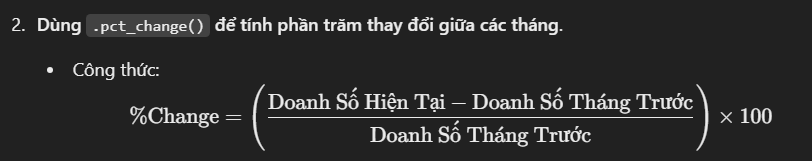

27.	Tính hệ số tương quan giữa số lượng sản phẩm bán ra và giá bán (Quantity và Price).

In [198]:
correlation = df["Quantity"].corr(df["Price"])
print("Hệ số tương quan giữa Quantity và Price:", correlation)

Hệ số tương quan giữa Quantity và Price: 0.017186790699578947


28.	Xác định sản phẩm có mức giá trung bình cao nhất và thấp nhất.

In [ ]:
temp_df = df.groupby(["Product"]).agg(Giá_Trb=("Price", "mean")).reset_index()

max_product = temp_df.loc[temp_df["Giá_Trb"].idxmax()]
min_product = temp_df.loc[temp_df["Giá_Trb"].idxmin()]

print("Sản phẩm có mức giá trung bình cao nhất")
print(max_product)

print("\nSản phẩm có mức giá trung bình thấp nhất")
print(min_product)

Sản phẩm có mức giá trung bình cao nhất
Product    Keyboard
Giá_Trb      328.24
Name: 1, dtype: object

Sản phẩm có mức giá trung bình thấp nhất
Product       Monitor
Giá_Trb    250.181818
Name: 3, dtype: object


29.	Xác định loại sản phẩm nào có doanh số trung bình cao nhất trong tuần (groupby theo Day_of_Week).

In [210]:
temp_df = df.groupby(["Product", "Weekday"]).agg(Giá_Trb=("Price", "mean")).reset_index()
temp_df = temp_df.loc[temp_df.groupby("Weekday")["Giá_Trb"].idxmax()]
temp_df = temp_df.sort_values(by="Weekday")
temp_df

,Product,Weekday,Giá_Trb
42,Printer,Chủ Nhật,377.058824
8,Keyboard,Thứ Ba,343.333333
9,Keyboard,Thứ Bảy,417.857143
17,Laptop,Thứ Hai,426.296296
11,Keyboard,Thứ Năm,405.454545
40,Phone,Thứ Sáu,380.526316
55,Tablet,Thứ Tư,336.250000


30.	Xác định sản phẩm nào có biên độ giá lớn nhất (max giá - min giá của từng sản phẩm).

In [229]:
temp_df = df.groupby("Product").agg(max=("Price", "max"), min=("Price", "min")).reset_index()
temp_df["Price Range"] = temp_df["max"] - temp_df["min"]
max_value = temp_df["Price Range"].max()
temp_df[temp_df["Price Range"] ==  max_value]

,Product,max,min,Price Range
0,Headphones,800,30,770
1,Keyboard,800,30,770
2,Laptop,800,30,770
3,Monitor,800,30,770
4,Mouse,800,30,770
5,Phone,800,30,770
6,Printer,800,30,770
7,Tablet,800,30,770


31.	Xác định tổng số lượng sản phẩm bán ra theo từng ngày trong tuần, tìm ngày có lượng sản phẩm bán ra cao nhất.

In [232]:
temp_df = df.groupby(["Weekday"]).agg(Số_lượng_bán_ra=("Quantity", "sum")).reset_index()
temp_df[temp_df["Số_lượng_bán_ra"] == temp_df["Số_lượng_bán_ra"].max()]

,Weekday,Số_lượng_bán_ra
3,Thứ Hai,496


32.	Xác định mức giá trung bình của các sản phẩm theo từng ngày trong tuần.

In [233]:
temp_df = df.groupby(["Weekday"]).agg(Số_lượng_bán_ra=("Price", "mean")).reset_index()
temp_df

,Weekday,Số_lượng_bán_ra
0,Chủ Nhật,301.851852
1,Thứ Ba,297.464789
2,Thứ Bảy,289.171975
3,Thứ Hai,291.882353
4,Thứ Năm,269.469697
5,Thứ Sáu,299.024390
6,Thứ Tư,283.546099


33.	Xác định tổng doanh số trung bình của từng ngày trong tuần và so sánh với tổng doanh số cả năm.

In [236]:
temp_df = df.groupby(["Weekday"]).agg(Doanh_Số_Trb=("Total_Sales", "mean")).reset_index()
temp_df["Rate"] = temp_df["Doanh_Số_Trb"] / df["Total_Sales"].sum() * 100
temp_df

,Weekday,Doanh_Số_Trb,Rate
0,Chủ Nhật,842.888889,0.096273
1,Thứ Ba,898.098592,0.102579
2,Thứ Bảy,930.573248,0.106288
3,Thứ Hai,890.000000,0.101654
4,Thứ Năm,823.106061,0.094013
5,Thứ Sáu,910.243902,0.103966
6,Thứ Tư,824.042553,0.094120


34.	Xác định sự chênh lệch doanh số giữa cuối tuần (Thứ 7, Chủ nhật) so với ngày thường (Thứ 2 - Thứ 6).

In [243]:
weekend_sales = df[df["Weekday"].isin(["Saturday", "Sunday"])]["Total_Sales"].sum()
weekday_sales = df[~df["Weekday"].isin(["Saturday", "Sunday"])]["Total_Sales"].sum()

print("Doanh số cuối tuần:", weekend_sales)
print("Doanh số ngày thường:", weekday_sales)

difference = weekend_sales - weekday_sales
print("Chênh lệch doanh số giữa cuối tuần và ngày thường:", difference)


Doanh số cuối tuần: 0
Doanh số ngày thường: 875520
Chênh lệch doanh số giữa cuối tuần và ngày thường: -875520


### Phần 4: Trực quan hóa dữ liệu

35.	Vẽ line chart thể hiện xu hướng doanh số theo thời gian (theo tháng).

36.	Vẽ bar chart thể hiện tổng doanh số theo từng quý.

37.	Vẽ pie chart thể hiện tỷ lệ doanh số của từng loại sản phẩm.

38.	Vẽ boxplot thể hiện sự phân phối doanh số theo từng tháng.